<a href="https://colab.research.google.com/github/shahoodzee/Introduction_to_supervised_learning/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
#@title Importing CSV file
df = pd.read_csv("credit_card.csv")
copyfile = pd.read_csv("credit_card.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
#@title Feature Selection

df = df.loc[:, ['BALANCE', 'CREDIT_LIMIT']]
df.head()

,BALANCE,CREDIT_LIMIT
0,40.900749,1000.0
1,3202.467416,7000.0
2,2495.148862,7500.0
3,1666.670542,7500.0
4,817.714335,1200.0


In [ ]:
#@title Cleaning Data
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [ ]:
#@title Creating Standard Data
from sklearn.preprocessing import StandardScaler
import numpy as np

Clus_dataSet = StandardScaler().fit_transform(df)
Clus_dataSet
# kmeans.cluster_centers_

array([[-0.73198937, -0.9602765 ],
       [ 0.78696085,  0.68871087],
       [ 0.44713513,  0.82612648],
       ...,
       [-0.7403981 , -0.9602765 ],
       [-0.74517423, -1.09769211],
       [-0.57257511, -0.90531025]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


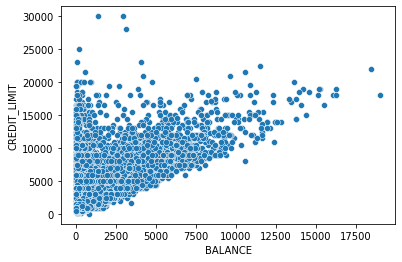

In [ ]:
#@title Visualize the data points
import seaborn as sns

X = df.values
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')
plt.show()

In [ ]:
#@title Applying K means
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(df)

clusters = kmeans.fit_predict(df)
clusters


array([1, 5, 0, ..., 1, 1, 1], dtype=int32)

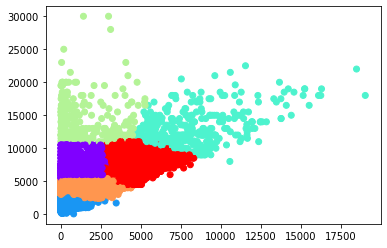

In [ ]:
#@title Clustering of data

data_with_clusters = df.copy()
data_with_clusters['Clusters'] = clusters
plt.scatter(data_with_clusters['BALANCE'],data_with_clusters['CREDIT_LIMIT'],c=data_with_clusters['Clusters'],cmap='rainbow')

Text(0, 0.5, 'WCSS')

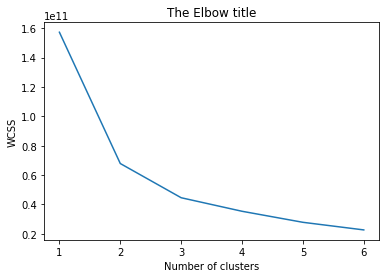

In [ ]:
#@title Sum of squared Distances

# Sum_of_squared_distances = []
# K = range(1,21)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(df)
#     Sum_of_squared_distances.append(km.inertia_)
# plt.plot(k,Sum_of_squared_distances)
# plt.title('The Elbow title')
# plt.xlabel('Number of clusters')
# plt.ylabel('Sum of Squared Distances')
# plt.show()
wcss=[]
for i in range(1,7):
  kmeans = KMeans(i)
  kmeans.fit(df)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

it means value of k(optimal) will be 3

In [ ]:
copyfile['CLUSTERS'] = kmeans.labels_
copyfile.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,5
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
#@title Checking Amount of Customers belonging to a Particular Cluster
copyfile['CLUSTERS'].value_counts()

1    3548
4    2439
0    1382
5     942
2     332
3     307
Name: CLUSTERS, dtype: int64

In [ ]:
#@title Exporting File in .csv Format
copyfile.to_csv('Card_clusters.csv', index = False)